In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression


From seaborn load iris dataset and save it in iris dataframe

In [ ]:
iris=sns.load_dataset('iris')

In [ ]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


return head of dataframe

In [ ]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


find the numbers of rows and columns

In [ ]:
iris.shape

(150, 5)

In [ ]:
iris['species'].unique()
iris['species'].nunique()

3

In [ ]:
iris['petal_length'].mean()

3.7580000000000005

In [ ]:
iris['petal_length'].max()
iris['petal_length'].min()

1.0

**Data Visualization**

Text(0.5, 1.0, 'scatter plot')

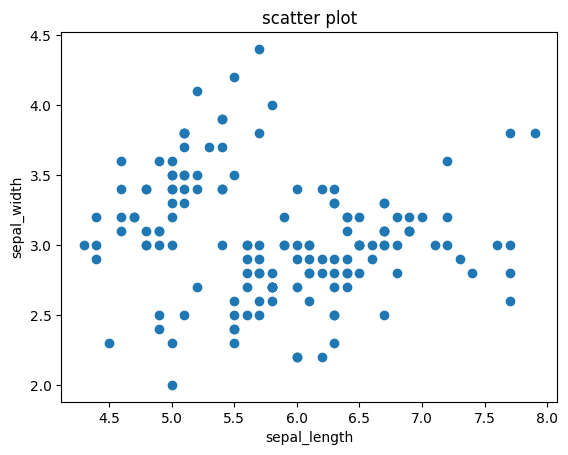

In [ ]:
plt.scatter(iris['sepal_length'],iris['sepal_width'])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title("scatter plot")

Scatter plot b/w petal length and petal width

Text(0.5, 1.0, 'scatter plot')

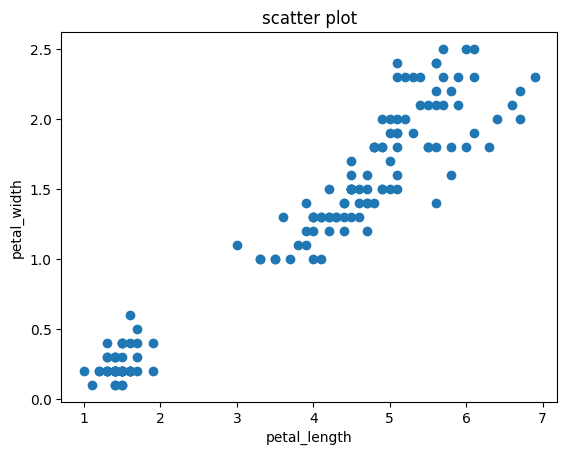

In [ ]:
plt.scatter(iris['petal_length'],iris['petal_width'])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title("scatter plot")


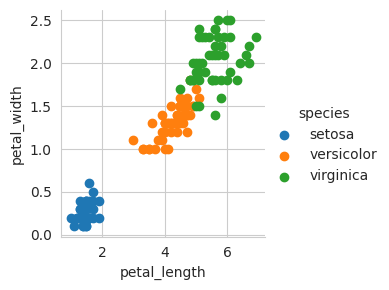

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(iris,hue="species")\
.map(plt.scatter,"petal_length","petal_width").add_legend()
plt.show()


Pair Plots

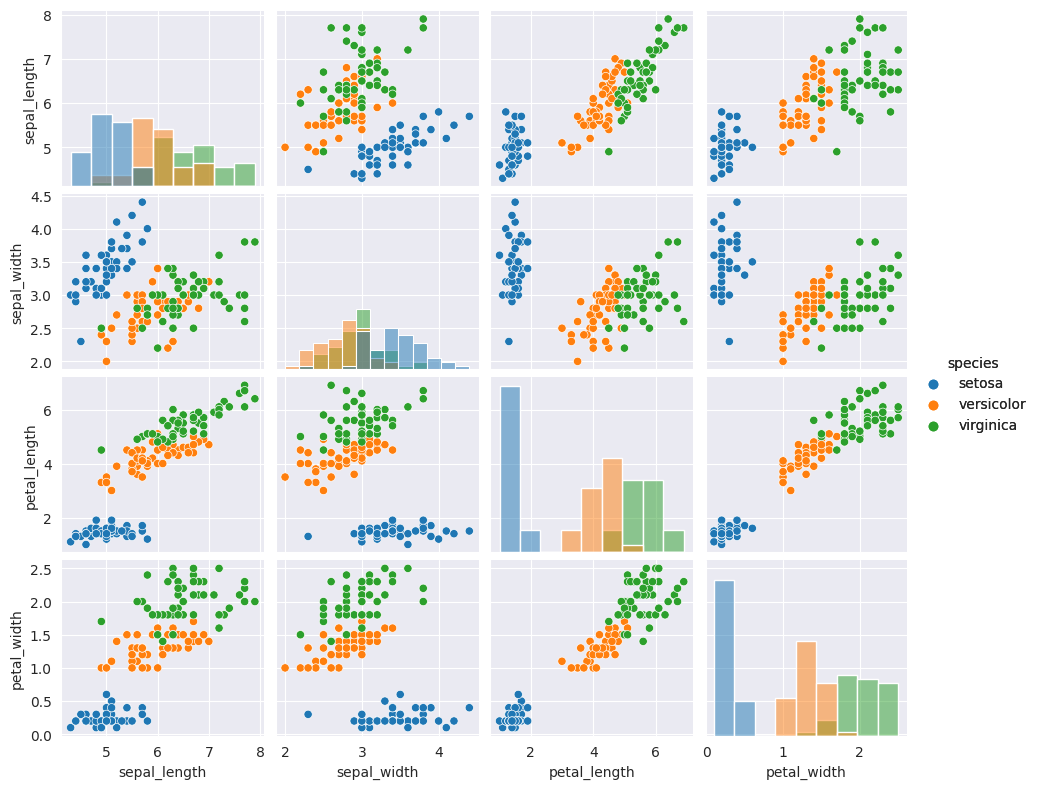

In [ ]:
sns.set_style("darkgrid")
sns.pairplot(iris,hue="species",height=2,diag_kind="hist").add_legend()
plt.show()

Box plot

<Axes: ylabel='sepal_length'>

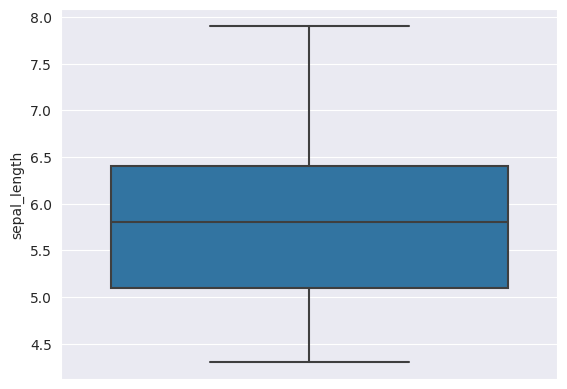

In [ ]:
sns.boxplot(y="sepal_length",data=iris)

Draw boxplot for petal length

<Axes: ylabel='petal_length'>

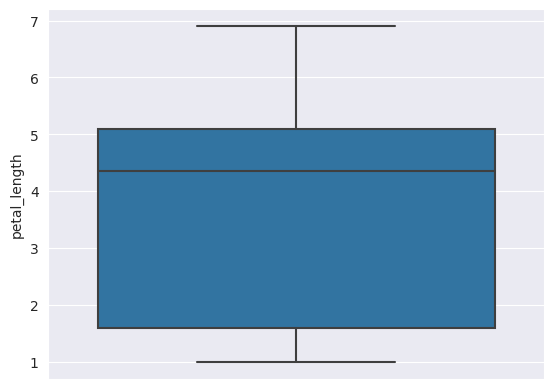

In [ ]:
sns.boxplot(y="petal_length",data=iris)

<Axes: xlabel='species', ylabel='sepal_length'>

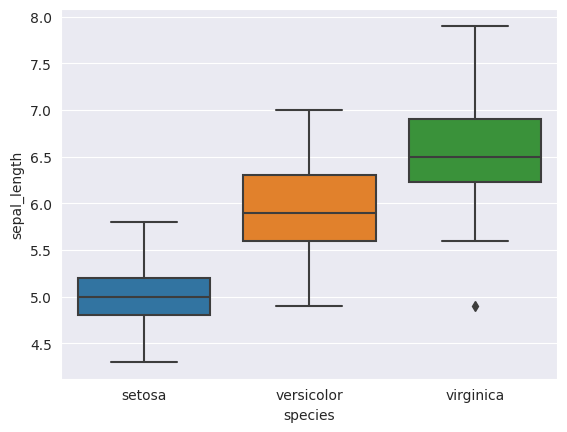

In [ ]:
sns.boxplot(x="species",y="sepal_length",data=iris)

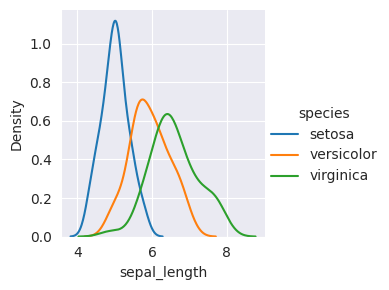

In [ ]:
#kernel Distribution Estimate
sns.FacetGrid(iris,hue="species",height=3)\
.map(sns.kdeplot,"sepal_length")\
.add_legend()
plt.show()

Line Plot

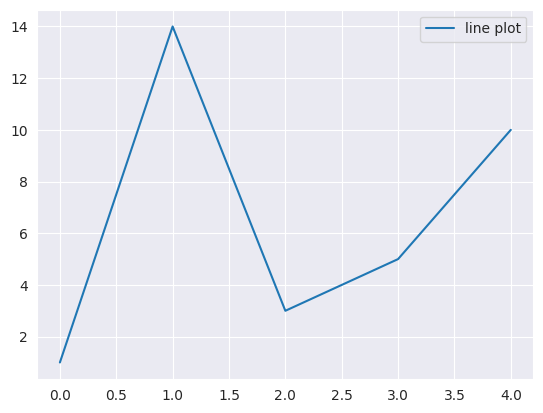

In [ ]:
y=[1,14,3,5,10]
plt.plot(y,label="line plot")
plt.legend()
plt.show()

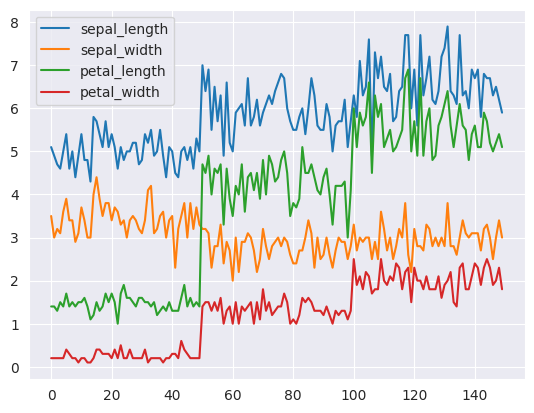

In [ ]:
# line plot
plt.plot(iris['sepal_length'],label="sepal_length")
plt.plot(iris['sepal_width'],label="sepal_width")
plt.plot(iris['petal_length'],label="petal_length")
plt.plot(iris['petal_width'],label="petal_width")
plt.legend();

**Coorelation**

In [ ]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

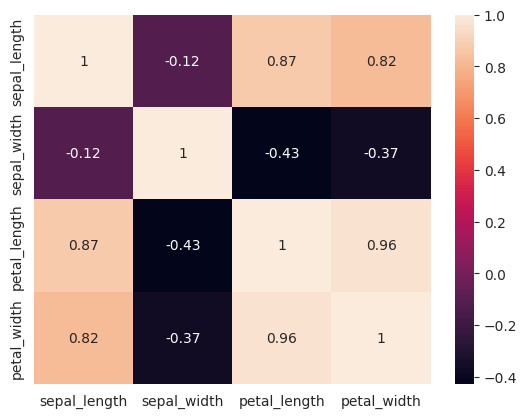

In [ ]:
sns.heatmap(iris.corr(),annot=True)

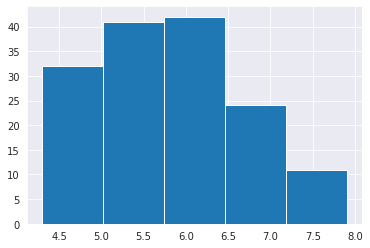

In [ ]:
plt.hist(iris['sepal_length'],bins=5)
plt.show()

In [ ]:
x=iris.drop(['species'],axis=1)
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y=iris['species']
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [ ]:
le=LabelEncoder()
y=le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

Add random_state to the train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

**Logistic Regression**

In [ ]:
lr=LogisticRegression(solver='newton-cg')

In [ ]:
lr.fit(x_train,y_train)

LogisticRegression(solver='newton-cg')

In [ ]:
y_pred1=lr.predict(x_test)

Get confusion matrix

In [ ]:
confusion_matrix(y_test,y_pred1)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 13]])

Text(0.5, 15.0, 'predicted label')

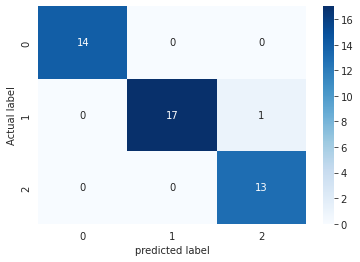

In [ ]:
sns.heatmap(data=confusion_matrix(y_test,y_pred1),annot=True,cmap="Blues")
plt.ylabel("Actual label")
plt.xlabel("predicted label")

Get Accuracy Score

In [ ]:
accuracy_score(y_test,y_pred1)

0.9777777777777777

**Decision Tree**

In [ ]:
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

In [ ]:
y_pred2=dtree.predict(x_test)

Confusion Matrix

In [ ]:
confusion_matrix(y_test,y_pred2)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]])

Text(0.5, 15.0, 'predicted label')

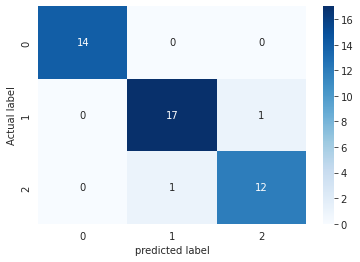

In [ ]:
sns.heatmap(data=confusion_matrix(y_test,y_pred2),annot=True,cmap="Blues")
plt.ylabel("Actual label")
plt.xlabel("predicted label")

In [ ]:
accuracy_score(y_test,y_pred2)

0.9555555555555556

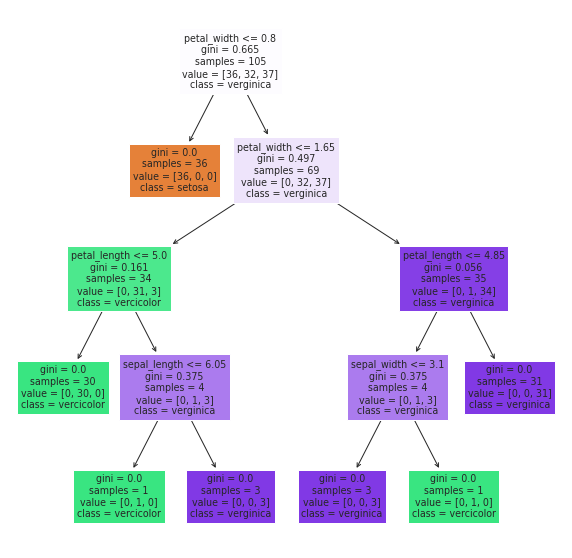

In [ ]:
plt.figure(figsize=(10,10))
dec_tree=plot_tree(decision_tree=dtree,feature_names=iris.columns[:-1],
    class_names=["setosa","vercicolor","verginica"],filled=True)

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf= RandomForestClassifier(n_estimators=2000)

Use 100 decision trees in random forest

In [ ]:
clf=RandomForestClassifier(n_estimators=100)

In [ ]:
clf.fit(x_train,y_train)

In [ ]:
y_pred3=clf.predict(x_test)

Get CM AS Heat Map

In [ ]:
confusion_matrix(y_test,y_pred3)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]])

In [ ]:
accuracy_score(y_test,y_pred3)

0.9555555555555556

Text(0.5, 15.0, 'predicted label')

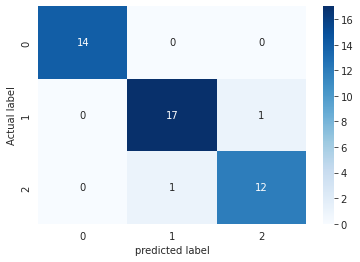

In [ ]:
sns.heatmap(data=confusion_matrix(y_test,y_pred3),annot=True,cmap="Blues")
plt.ylabel("Actual label")
plt.xlabel("predicted label")